In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

class GridWorld:
    """
    GridWorld environment for TD Learning.
    Grid cell codes:
    0 = normal (step penalty)
    1 = goal (+1)
    2 = poison (-1)
    3 = wall (non-passable)
    """

    def __init__(self, grid_map, step_cost=-0.1, goal_reward=1.0, poison_penalty=-1.0):
        self.map = np.array(grid_map)
        self.num_rows, self.num_cols = self.map.shape
        self.num_states = self.num_rows * self.num_cols
        self.num_actions = 4  # up, right, down, left

        # Define rewards per cell type
        self.rewards = {
            0: step_cost,      # normal c
            1: goal_reward,    # goal
            2: poison_penalty, # poison
            3: 0.0             # wall
        }

        self.reward_function = self._build_reward_function()

    def reset(self):
        """
        Resets the environment to the starting state.
        Returns:
            state (int): Initial non-terminal, non-wall state
        """
        while True:
            r = np.random.randint(self.num_rows)
            c = np.random.randint(self.num_cols)
            if self.map[r, c] == 0:  # Normal cell only
                self.current_state = self.get_state(r, c)
                break
        return self.current_state

    def step(self, action):
        """
        Takes an action from the current state and returns the result.
        Parameters:
            action (int): 0=up, 1=right, 2=down, 3=left
        Returns:
            next_state (int): resulting state
            reward (float): reward received
            done (bool): whether the episode has ended
        """
        r, c = self.get_position(self.current_state)

        # Define motion directions
        directions = [(-1, 0), (0, 1), (1, 0), (0, -1)]
        dr, dc = directions[action]
        new_r, new_c = r + dr, c + dc

        # Check boundaries and walls
        if 0 <= new_r < self.num_rows and 0 <= new_c < self.num_cols and self.map[new_r, new_c] != 3:
            next_state = self.get_state(new_r, new_c)
        else:
            next_state = self.current_state  # Bounce back

        reward = self.reward_function[next_state]
        done = self.map[new_r, new_c] in [1, 2] if (0 <= new_r < self.num_rows and 0 <= new_c < self.num_cols) else False

        self.current_state = next_state
        return next_state, reward, done

    def _build_reward_function(self):
        rewards = np.zeros(self.num_states)
        for r in range(self.num_rows):
            for c in range(self.num_cols):
                s = self.get_state(r, c)
                cell_type = self.map[r, c]
                rewards[s] = self.rewards[cell_type]
        return rewards

    def get_state(self, row, col):
        return row * self.num_cols + col

    def get_position(self, state):
        return divmod(state, self.num_cols)

    def display_map(self):
        """
        Displays the GridWorld layout (walls, goal, poison, etc.)
        """
        fig, ax = plt.subplots(figsize=(self.num_cols, self.num_rows))
        cmap = {0: 'white', 1: '#00917C', 2: '#FF5252', 3: 'black'}

        for r in range(self.num_rows):
            for c in range(self.num_cols):
                cell_type = self.map[r, c]
                rect = patches.Rectangle((c, self.num_rows - r - 1), 1, 1,
                                         facecolor=cmap[cell_type], edgecolor='gray')
                ax.add_patch(rect)

        ax.set_xlim(0, self.num_cols)
        ax.set_ylim(0, self.num_rows)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title("GridWorld Layout")
        plt.show()

    def show_state_numbering(self):
        """
        Displays the grid with state numbers annotated in each cell.
        """
        fig, ax = plt.subplots(figsize=(self.num_cols, self.num_rows))
        cmap = {0: 'white', 1: '#00917C', 2: '#FF5252', 3: 'black'}

        for r in range(self.num_rows):
            for c in range(self.num_cols):
                s = self.get_state(r, c)
                cell_type = self.map[r, c]
                color = cmap[cell_type]

                rect = patches.Rectangle((c, self.num_rows - r - 1), 1, 1,
                                         facecolor=color, edgecolor='gray')
                ax.add_patch(rect)

                if cell_type != 3:
                    ax.text(c + 0.5, self.num_rows - r - 0.5,
                            f"s = {s}", ha='center', va='center', fontsize=10, weight='bold')

        ax.set_xlim(0, self.num_cols)
        ax.set_ylim(0, self.num_rows)
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title("GridWorld State Numbering", fontsize=14)
        plt.show()

    def display_reward_map(self):
        """
        Displays the grid with reward values annotated for each state.
        """
        fig, ax = plt.subplots(figsize=(self.num_cols, self.num_rows))
        cmap = {0: 'white', 1: '#00917C', 2: '#FF5252', 3: 'black'}

        for r in range(self.num_rows):
            for c in range(self.num_cols):
                cell_type = self.map[r, c]
                s = self.get_state(r, c)
                color = cmap[cell_type]

                rect = patches.Rectangle((c, self.num_rows - r - 1), 1, 1,
                                         facecolor=color, edgecolor='gray')
                ax.add_patch(rect)

                if cell_type != 3:
                    reward = self.reward_function[s]
                    ax.text(c + 0.5, self.num_rows - r - 0.5,
                            f"R = {reward:.2f}", ha='center', va='center', fontsize=10)

        ax.set_xlim(0, self.num_cols)
        ax.set_ylim(0, self.num_rows)
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title("Reward Function Map")
        plt.show()


    def plot_state_values(self, values):
        """
        Plot state values as a heatmap.
        """
        reshaped = values.reshape(self.num_rows, self.num_cols)
        plt.figure(figsize=(self.num_cols+1.25, self.num_rows+1.25))
        ax = sns.heatmap(reshaped, annot=True, fmt=".2f", cmap="coolwarm",
                        annot_kws={"size": 14}, square=True, linewidths=0.5)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.show()

    def _quatromatrix(self, left, bottom, right, top, ax=None, triplotkw={}, tripcolorkw={}):
        if not ax:
            ax = plt.gca()
        n, m = left.shape

        a = np.array([[0, 0], [0, 1], [0.5, 0.5], [1, 0], [1, 1]])
        tr = np.array([[0, 1, 2], [0, 2, 3], [2, 3, 4], [1, 2, 4]])

        A = np.zeros((n * m * 5, 2))
        Tr = np.zeros((n * m * 4, 3), dtype=int)

        for i in range(n):
            for j in range(m):
                k = i * m + j
                A[k * 5:(k + 1) * 5, :] = np.c_[a[:, 0] + j, a[:, 1] + i]
                Tr[k * 4:(k + 1) * 4, :] = tr + k * 5

        C = np.c_[left.flatten(), bottom.flatten(), right.flatten(), top.flatten()].flatten()

        ax.triplot(A[:, 0], A[:, 1], Tr, **triplotkw)
        tripcolor = ax.tripcolor(A[:, 0], A[:, 1], Tr, facecolors=C, **tripcolorkw)
        return tripcolor

    def plot_action_values(self, q_values):
        """
        Visualizes Q-values (action-values) for each state in the grid.
        Triangles in each cell indicate value of Up (0), Right (1), Down (2), Left (3).
        """
        num_states, num_actions = q_values.shape
        assert num_states == self.num_states and num_actions == self.num_actions

        rows, cols = self.num_rows, self.num_cols
        top = q_values[:, 0].reshape((rows, cols))
        right = q_values[:, 1].reshape((rows, cols))
        bottom = q_values[:, 2].reshape((rows, cols))
        left = q_values[:, 3].reshape((rows, cols))

        # Text annotation positions
        top_pos = [(j + 0.38, i + 0.25) for i in range(rows) for j in range(cols)]
        right_pos = [(j + 0.65, i + 0.5) for i in range(rows) for j in range(cols)]
        bottom_pos = [(j + 0.38, i + 0.8) for i in range(rows) for j in range(cols)]
        left_pos = [(j + 0.05, i + 0.5) for i in range(rows) for j in range(cols)]

        fig, ax = plt.subplots(figsize=(cols*2.0, rows*2.0))
        ax.set_ylim(rows, 0)

        # Triangular heatmap with Q-values
        tripcolor = self._quatromatrix(left, bottom, right, top, ax=ax,
                                      triplotkw={"color": "k", "lw": 1},
                                      tripcolorkw={"cmap": "coolwarm"})

        # Add text annotations
        for i, (x, y) in enumerate(top_pos):
            ax.text(x, y, f"{top.flatten()[i]:.2f}", size=11, color="w")
        for i, (x, y) in enumerate(right_pos):
            ax.text(x, y, f"{right.flatten()[i]:.2f}", size=11, color="w")
        for i, (x, y) in enumerate(bottom_pos):
            ax.text(x, y, f"{bottom.flatten()[i]:.2f}", size=11, color="w")
        for i, (x, y) in enumerate(left_pos):
            ax.text(x, y, f"{left.flatten()[i]:.2f}", size=11, color="w")

        ax.margins(0)
        ax.set_aspect("equal")
        fig.colorbar(tripcolor)
        ax.set_title("Action-Value Function (Q-values)")
        plt.show()



In [2]:
# Define a 3x4 grid map layout:
# 0 = normal cell, 1 = goal, 2 = poison, 3 = wall

grid_map = [
    [0, 0, 0, 1],
    [0, 3, 0, 2],
    [0, 0, 0, 0]
]

# Initialize the GridWorld environment
env = GridWorld(grid_map)

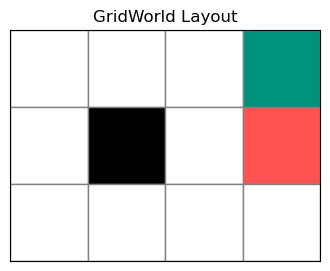

In [3]:
# Show the grid with color-coded cells
env.display_map()

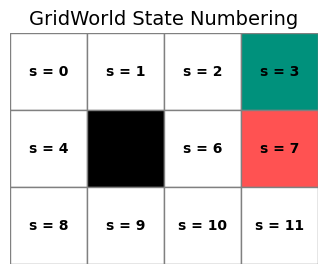

In [4]:
# Call the function to display state numbering
env.show_state_numbering()

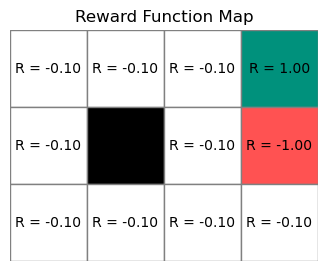

In [5]:
# Call the function to display rewards
env.display_reward_map()

In [6]:
def td_zero_prediction(env, num_episodes=5000, discount_factor=0.99, learning_rate=0.01):
    """
    Implements the TD(0) prediction algorithm to estimate state values.

    Parameters:
    - env: GridWorld environment object
    - num_episodes: number of episodes to run
    - discount_factor (gamma): how much future rewards are valued
    - learning_rate (alpha): step size for updating value estimates

    Returns:
    - V: A NumPy array of shape [num_states], with estimated state values
    """
    V = np.zeros(env.num_states)  # Initialize state-value function

    # Set terminal states (goal and poison) to their known final rewards
    for s in range(env.num_states):
        r, c = env.get_position(s)
        if env.map[r, c] in [1, 2]:  # Goal or poison
            V[s] = env.reward_function[s]

    for episode in range(num_episodes):
        state = env.reset()

        while True:
            # Choose a random action (uniform policy)
            action = np.random.randint(env.num_actions)

            # Take a step in the environment
            next_state, reward, done = env.step(action)

            # TD(0) Update
            V[state] += learning_rate * (
                reward + discount_factor * V[next_state] - V[state]
            )

            # Move to next state
            state = next_state

            if done:
                break

    return V

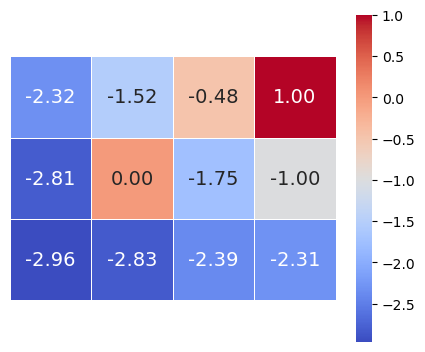

In [7]:
# Run TD(0)
td_values = td_zero_prediction(env, num_episodes=5000, discount_factor=0.99, learning_rate=0.01)

# Visualize the learned value function
env.plot_state_values(td_values)

In [8]:
import numpy as np
import random

def sarsa(env, num_episodes=5000, alpha=0.01, gamma=0.99, epsilon_decay=0.99, min_epsilon=0.05):
    """
    SARSA algorithm: On-policy Temporal-Difference control to estimate the Q-function.
    """

    # Initialize Q-table with zeros: shape = [number of states x number of actions]
    Q = np.zeros((env.num_states, env.num_actions))

    # Optionally initialize Q-values for terminal states for stability
    for s in range(env.num_states):
        r, c = env.get_position(s)  # Get (row, col) of the state
        if env.map[r, c] == 1:      # Goal state
            Q[s, :] = 1.0
        elif env.map[r, c] == 2:    # Trap (death) state
            Q[s, :] = -1.0

    # Define epsilon-greedy action selection strategy
    def get_action(q_values, epsilon):
        if random.random() < epsilon:  # With probability ε, explore
            return random.randint(0, env.num_actions - 1)
        else:                          # Otherwise, exploit the best action
            return np.argmax(q_values)

    epsilon = 1.0  # Start with full exploration

    # Loop over episodes
    for episode in range(num_episodes):
        state = env.reset()  # Reset environment to a random starting state
        action = get_action(Q[state], epsilon)  # Choose initial action
        done = False  # Track episode termination

        while not done:
            next_state, reward, done = env.step(action)  # Take action → observe outcome
            next_action = get_action(Q[next_state], epsilon)  # Choose next action using policy

            # Compute the TD target and error
            td_target = reward + gamma * Q[next_state][next_action]
            td_error = td_target - Q[state][action]

            # Update the Q-value towards the TD target
            Q[state][action] += alpha * td_error

            # Move to the next state and action
            state = next_state
            action = next_action

        # Decay ε after each episode, but keep it above a minimum value
        epsilon = max(min_epsilon, epsilon * epsilon_decay)

    return Q  # Return the learned Q-table



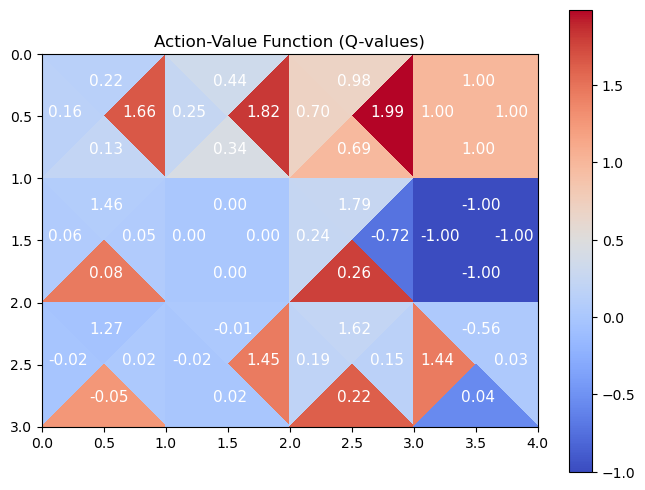

In [9]:
# Run SARSA
q_sarsa = sarsa(env, num_episodes=5000)

# Visualize the Q-values
env.plot_action_values(q_sarsa)


In [10]:
import numpy as np
import random

def q_learning(env, num_episodes=5000, alpha=0.01, gamma=0.99, epsilon_decay=0.99, min_epsilon=0.05):
    """
    Q-Learning algorithm: Off-policy TD control to estimate the optimal Q-function.
    """

    # Initialize Q-table with zeros: shape = [number of states x number of actions]
    Q = np.zeros((env.num_states, env.num_actions))

    # Optionally initialize Q-values for terminal states for faster convergence
    for s in range(env.num_states):
        r, c = env.get_position(s)  # Get (row, col) position
        if env.map[r, c] == 1:      # Goal state
            Q[s, :] = 1.0
        elif env.map[r, c] == 2:    # Trap state
            Q[s, :] = -1.0

    # Define ε-greedy policy for action selection
    def get_action(q_values, epsilon):
        if random.random() < epsilon:  # Explore
            return random.randint(0, env.num_actions - 1)
        else:                          # Exploit
            return np.argmax(q_values)

    epsilon = 1.0  # Initial exploration probability

    # Loop through all episodes
    for episode in range(num_episodes):
        state = env.reset()  # Start from a random non-terminal state
        done = False  # Whether the episode has ended

        while not done:
            # Choose action using current ε-greedy policy
            action = get_action(Q[state], epsilon)

            # Perform the action and observe outcome
            next_state, reward, done = env.step(action)

            # Q-Learning update uses the maximum Q-value of next state (greedy)
            best_next_q = np.max(Q[next_state])
            td_target = reward + gamma * best_next_q  # TD target
            td_error = td_target - Q[state][action]   # TD error

            # Update the Q-value
            Q[state][action] += alpha * td_error

            # Transition to the next state
            state = next_state

        # Decay ε at the end of each episode
        epsilon = max(min_epsilon, epsilon * epsilon_decay)

    return Q  # Return the learned Q-table


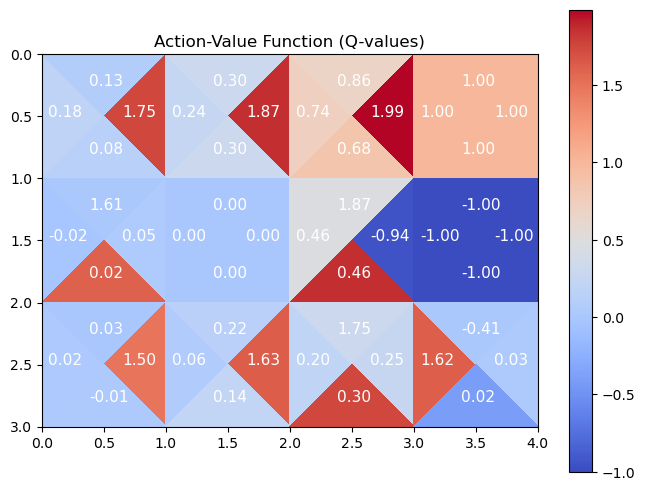

In [11]:
# Run Q-learning
q_learning = q_learning(env, num_episodes=5000)

# Visualize the Q-values
env.plot_action_values(q_learning)